# ODEs 3
* System of equations
* Higher order derivatives
* Decoupled ODEs
* Adaptive time steps

## ODE system
* So far we have considered $dy/dt = f(y,t)$, with one equation in one variable.
* For a system of ODEs, we have $d\vec{y}/{dt} = \vec{f}(\vec{y},t).$
    * For example, for 2 ODEs in 2 variables:
        $$ \frac{dx}{dt} = g(x,z,t), $$
        $$ \frac{dz}{dt} = h(x,z,t).$$
    * We can write this as 
    $$ \frac{d\vec{y}}{dt} = \vec{f}(\vec{y},t),$$
    
    where $x=y[0]$, $z=y[1]$, $g=f[0]$ and $h=f[1]$.
    * Note that each rate depends (in general) on all the variables.
    * Note, below, we'll leave off the vector arrow symbols for simplicity.


* Explicit solution is a straightforward extension of the one equation case. Python's array functionality even allows nearly identical codes for systems of equations and for one equation.
* Implicit solutions require solution of a linear system of equations at each step for linear ODE systems. For nonlinear ODE systems, a nonlinear system must be solved at each step.
    * Linear:
    $$f(y) = Ay + b,$$
    $$ y_{k+1} = y_k + \Delta t(Ay_{k+1}+b),$$
    $$(I-\Delta tA)y_{k+1} = (y_k + \Delta tb).$$
    This last equation has the form $By_{k+1}=c$, which is a linear system solved for $y_{k+1}$ at each step.
        * Note, $A$ and $b$ can depend on time, which is not explicitly shown.
    * Nonlinear:
    $$y_{k+1} = y_k + \Delta t f(y_{k+1},t).$$
        * Rearrange and solve the following nonlinear system for the $y_{k+1}$ vector at each step:
        $$ F(y_{k+1}) = y_{k+1}-y_k - \Delta tf(y_{k+1},t) = 0.$$

## Example
The following reactions are given:
$$A + B \rightarrow C,$$
$$A + C \rightarrow D.$$
* Reactions have rate constants $k_1 = 1$ and $k_2 = 2$.
* Let $A_0=B_0=1$ and $C_0=D_0=0$.
* Solve to 5 seconds.
* Species concentrations are given by the following rate equations:
\begin{align*}
\frac{dA}{dt} &= -k_1AB - k_2AC, \\
\frac{dB}{dt} &= -k_1AB,         \\
\frac{dC}{dt} &=  k_1AB - k_2AC, \\
\frac{dD}{dt} &=          k_2AC.
\end{align*}



Solve this system using the fourth order RK method:
\begin{align*}
y_{k+1} &= y_k + h\left(\frac{1}{6}S_1 + \frac{2}{6}S_2 + \frac{2}{6}S_3 + \frac{1}{6}S_4\right),\\
& S_1 = f(y_k), \\
& S_2 = f(y_k+\frac{h}{2}S_1), \\
& S_3 = f(y_k+\frac{h}{2}S_2), \\
& S_4 = f(y_k+hS_3). 
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def odeRK4(f, y0, t):
    ns = len(t)-1
    y  = np.zeros((len(t), len(y0)))
    y[0,:] = y0
    
    for k in range(ns):
        h = t[k+1] - t[k]
        S1 = f(y[k,:],t[k])
        S2 = f(y[k,:]+0.5*h*S1, t[k]+0.5*h)
        S3 = f(y[k,:]+0.5*h*S2, t[k]+0.5*h)
        S4 = f(y[k,:]+    h*S3, t[k]+    h)
        y[k+1,:] = y[k,:] + h/6*(S1 + 2*S2 + 2*S3 + S4)
        
    return y

In [3]:
def rhsf(ABCD, t):
    A = ABCD[0]
    B = ABCD[1]
    C = ABCD[2]
    D = ABCD[3]
    
    k1 = 1
    k2 = 2
    
    dAdt = -k1*A*B - k2*A*C
    dBdt = -k1*A*B
    dCdt =  k1*A*B - k2*A*C
    dDdt =  k2*A*C
    
    return np.array([dAdt, dBdt, dCdt, dDdt])

In [4]:
ABCD_initial = np.array([1,1,0,0])    
tend = 5
t = np.linspace(0,tend,100)

ABCD = odeRK4(rhsf, ABCD_initial, t)

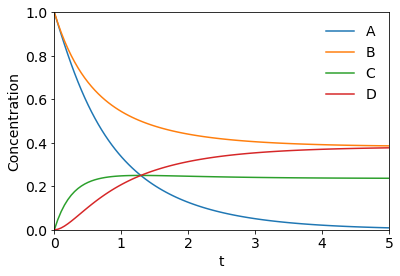

In [5]:
plt.rc('font', size=14)
plt.plot(t,ABCD)
plt.xlabel('t')
plt.ylabel('Concentration')
plt.xlim([0,tend])
plt.ylim([0,1])
plt.legend(['A', 'B', 'C', 'D'], frameon=False);
    

## Higher order derivatives
* A single higher order ODE results in a system of first order ODEs.
$$y^{\prime\prime\prime}=\frac{d^3y}{dt^3} = f(y,y^{\prime},y^{\prime\prime},t).$$

Question: can we solve this using the techniques we have used for first order ODE's? If so, how?

Can you convert this one third-order equation to a system of three first-order equations?

$$y^{\prime\prime\prime}=\frac{d^3y}{dt^3} = f(y,y^{\prime},y^{\prime\prime},t).$$

* let $x=y^{\prime\prime}$, then $y^{\prime\prime\prime}=x^{\prime}$.
* let $z=y^{\prime}$, then $y^{\prime\prime}=z^{\prime}$.
* Then the resulting system of ODEs is:

\begin{align}
x^{\prime} &= \frac{dx}{dt} = f(y,z,x,t), \\
y^{\prime} &= \frac{dy}{dt} = z, \\
z^{\prime} &= \frac{dz}{dt} = x.
\end{align}

* This is a system of three first order ODEs in three variables. 

## Decoupled equations

* Consider a linear system of ODEs.
$$y^{\prime} = Ay+b.$$

* In general, each rate equation depends on all the variables. 

* In our linear algebra review, we discussed how to decouple a system of linear equations.
    * How did we do that?

* To decouple the system, change to an eigenvector basis so that each component equation depends only on its own variable (in the new basis) 
* Let $V$ be a matrix whose columns are the eigenvectors of matrix $A$.
* Let $\Lambda$ be a diagonal matrix whose diagonal elements are the eigenvalues of $A$.

* Then,

$$AV = V\Lambda,$$
$$A = V\Lambda V^{-1}.$$

* Insert this into the ODE:
$$y^{\prime} = V\Lambda V^{-1}y + b.$$
* Multiply through by $V^{-1}$:
$$(V^{-1}y^{\prime}) = \Lambda(V^{-1}y) + (V^{-1}b).$$
* Now, let $\hat{y}=V^{-1}y$, and $\hat{b}=V^{-1}b$:
$$\hat{y}^{\prime} = \Lambda \hat{y} + \hat{b}.$$
* Because $\Lambda$ is diagonal, this system is decoupled. That is component $i$ is given by
$$\hat{y}^{\prime}_i = \lambda_i\hat{y}_i + \hat{b}_i.$$
* This equation has a simple analytic solution.
    * When solved, all the $\hat{y}_i(t)$ are known. 
    * Then $y(t)$ are given by
    $$y(t) = V\hat{y}(t).$$
    
This analysis can be useful for solving ODEs analytically, but also for analyzing (and modifying) stability properties of ODEs.

## ODE Step Size
* See [Numerical Recipes](http://s3.amazonaws.com/nrbook.com/book_C210.html) section 16.2 for more detailed explanations.
* When solving an ODE, we needed a step size $\Delta t$ or $h$.
* How should we select the step size?

Consider integrating $dy/dt = \tanh(t)$
* What part of the solution will dictate the step size?

* Do we have to use this step size everywhere?
* If not, how can we make the computer choose the stepsize in an "intelligent" way?


Suppose we know the error $\Delta$ for a given step size $\Delta t=h_1$.
* We'll show how to get $\Delta$ below.

Suppose we set some desired error that we are okay with on a given step, like $|\Delta|\le\epsilon = atol + |y|rtol.$ 
* A large $y\rightarrow$ rtol controls; 
* A small $y\rightarrow$ atol controls.

Given a known error for a known step, how can we change our step to get the desired error? Assume we are using the RK4 method.



Adjust $h$ to get the desired error.
* For a globally $4^{th}$ order method $\rightarrow$ $\Delta = \mathcal{O}(h^5)$ $\rightarrow$ $\Delta\sim h^5$.
* Then 
$$\frac{\Delta_2}{\Delta_1} = \frac{\epsilon}{\Delta_1} = \left(\frac{h_2}{h_1}\right)^5,$$
<font color='blue'>
$$\rightarrow h_2 = h_1\left(\frac{\epsilon}{\Delta_1}\right)^{1/5}.$$
</font>
* So, guess an initial $h_1$.
    * If the error $\Delta_1$ is too big, then redo the step using a smaller $h$ as computed using the above equation.
    * If the error is too small, take the step, but do the *next* step with a larger $h$ computed using the equation above.

### How to compute $\Delta$

* See N.R.
* Two approaches:
    1. Step doubling
    2. Felberg.
    


#### Step doubling


* Consider two grids where we can either take two size $h$ steps, or one size $2h$ step:
``` 
(A)   <----h---->|<----h---->
(B)   <---------2h---------->
```
* Now, let $\Delta$ = $y_B-y_A$.
    * Recall, if the error of the method (per step) is $\mathcal{O}(h^5)$, then 
        
        \begin{align}
        y_{exact} &= y_A + 2\mathcal{O}(h^5), \\
        y_{exact} &= y_B + \mathcal{O}((2h)^5) = y_B + 32\mathcal{O}(h^5).
        \end{align}
    * The error in $y_{B}$ is 16 times larger than the error in $y_{A}$, so we consider $y_A$ to be exact (compared to $y_B$), and evaluate $\Delta = y_B-y_A$. 


* ***Cost*** 
    * Each RK step requires 4 function evaluations.
    * 3 total steps (two for grid (A) and one for grid (B)) $\rightarrow$ 12 function evaluations. Actually 11, since the grids share a starting point.
    * We compare 11 required using step doubling to 8 required without step doubling.
    * <font color='blue'>37.5%=(11-8)/8 is the cost increase.</font>
    * This cost increase pays for itself in terms of allowing (ideally) at least 37.5% fewer overall steps due to the adaptive stepsize control.
        * For a given error, without adaptive stepsize, the *whole* time domain would have to use the most stringent step size.
   

#### [Felberg](https://onlinelibrary.wiley.com/doi/abs/10.1002/zamm.19660460102)

* You can write an RK method where one linear combination of slopes results in an $\mathcal{O}(h^6)$ method, and another combination of the same slopes gives an $\mathcal{O}(h^5)$ method.

\begin{align}
y_{k+1}       &= y_k + h(a_1S_1 + a_2S_2 + a_3S_3 + a_4S_4 + a_5S_5 + a_6S_6 ) + \mathcal{O}(h^6),\\
\hat{y}_{k+1} &= y_k + h(b_1S_1 + b_2S_2 + b_3S_3 + b_4S_4 + b_5S_5 + b_6S_6 ) + \mathcal{O}(h^5).
\end{align}

* Then let $\Delta=y_{k+1}-\hat{y}_{k+1}$.

[See Hoffman](https://ignite.byu.edu/che541/lectures/felberg.pdf)